In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# For reproducibility
from teachopencadd.utils import seed_everything
SEED = 42
seed_everything(SEED)

In [2]:
test_file_path = "../Data/Data/Initial Filtering/test_filter.csv"
train_file_path = "../Data/Data/Initial Filtering/train_filter.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

train_num = train_df.select_dtypes(include = ['float64', 'int64'])

print("Full train dataset shape is {}".format(train_df.shape))
print("Full test dataset shape is {}".format(test_df.shape))

Full train dataset shape is (1460, 67)
Full test dataset shape is (1459, 66)


# Identify Outliers Using Scatter Plots

In [3]:
train_df.dtypes[train_df.dtypes != 'object']

Unnamed: 0         int64
Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
MasVnrArea       float64
BsmtUnfSF          int64
LowQualFinSF       int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
PoolArea           int64
MiscVal            int64
MoSold             int64
SalePrice          int64
HouseAge           int64
HouseModelAge      int64
TotalSF            int64
TotalArea          int64
TotalBath        float64
TotalPorchSF       int64
dtype: object

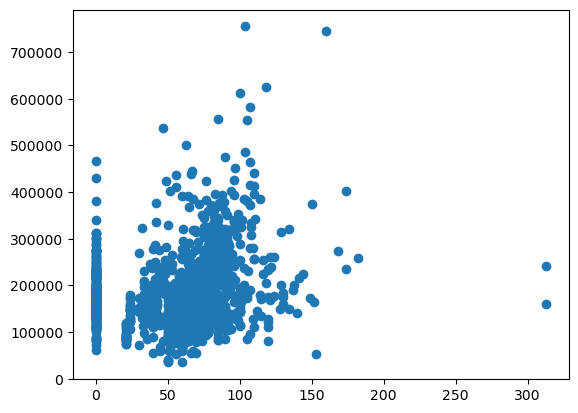

In [4]:
plt.scatter(train_df["LotFrontage"], train_df["SalePrice"])

In [5]:
train_df["LotFrontage"].sort_values().tail(2)

1298    313.0
934     313.0
Name: LotFrontage, dtype: float64

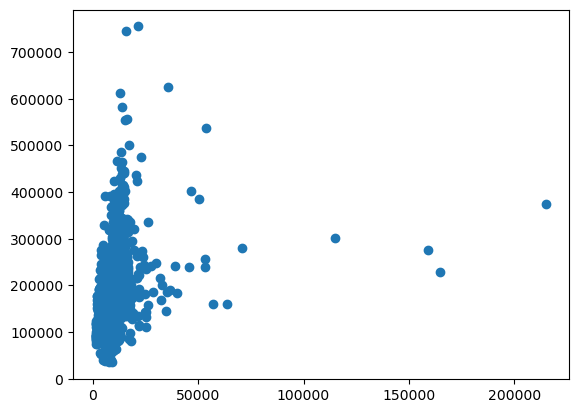

In [6]:
plt.scatter(train_df["LotArea"], train_df["SalePrice"])

In [7]:
train_df["LotArea"].sort_values().tail(5)

451     70761
706    115149
249    159000
335    164660
313    215245
Name: LotArea, dtype: int64

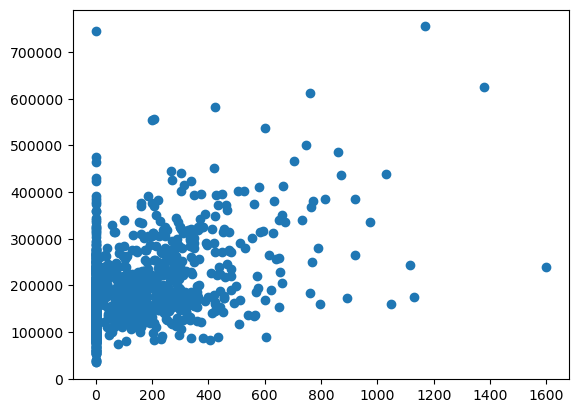

In [8]:
plt.scatter(train_df["MasVnrArea"], train_df["SalePrice"])

In [9]:
stats.zscore(train_df["MasVnrArea"]).sort_values().tail(10)

517     4.526957
224     4.532492
981     4.825845
58      5.135803
808     5.224363
70      5.600741
115     5.678230
691     5.905164
1169    7.056438
297     8.285201
Name: MasVnrArea, dtype: float64

In [10]:
#show MasVnrArea column
train_df["MasVnrArea"].sort_values().tail(10)

517      921.0
224      922.0
981      975.0
58      1031.0
808     1047.0
70      1115.0
115     1129.0
691     1170.0
1169    1378.0
297     1600.0
Name: MasVnrArea, dtype: float64

In [11]:
train_df["BsmtUnfSF"].sort_values().tail(10)

137     1907
798     1926
774     1935
496     1969
1267    2002
581     2042
678     2046
278     2121
477     2153
224     2336
Name: BsmtUnfSF, dtype: int64

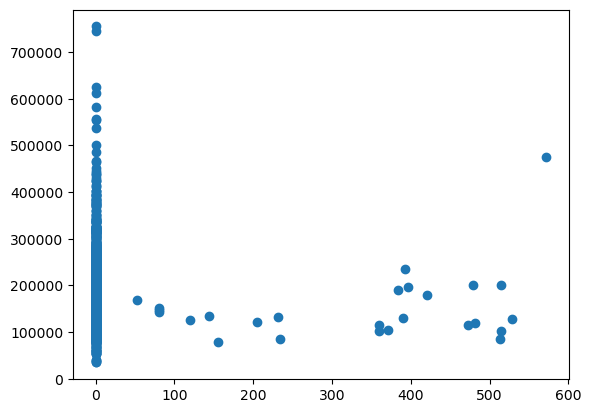

In [12]:
plt.scatter(train_df["LowQualFinSF"], train_df["SalePrice"])

In [13]:
train_df["LowQualFinSF"].sort_values().tail(1)

185    572
Name: LowQualFinSF, dtype: int64

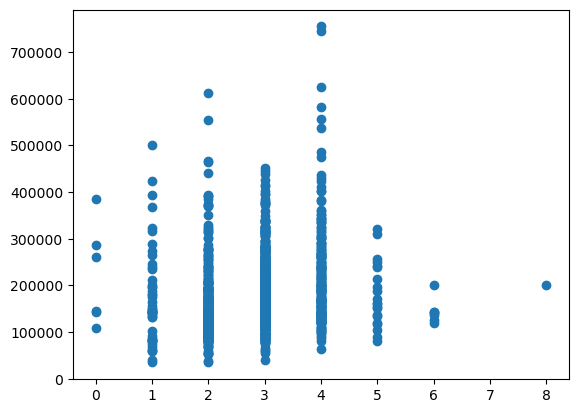

In [14]:
plt.scatter(train_df["BedroomAbvGr"], train_df["SalePrice"])

In [15]:
train_df["BedroomAbvGr"].sort_values().tail(2)

330    6
635    8
Name: BedroomAbvGr, dtype: int64

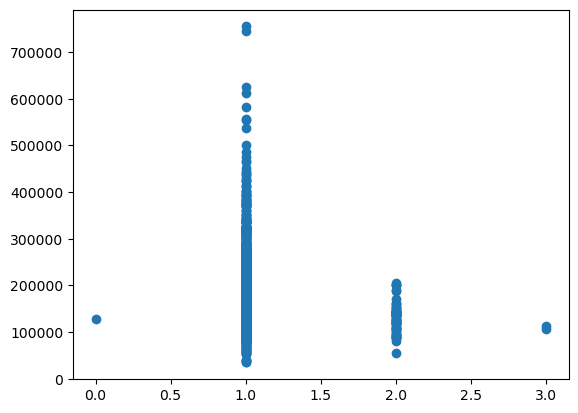

In [16]:
plt.scatter(train_df["KitchenAbvGr"], train_df["SalePrice"])

In [17]:
train_df["KitchenAbvGr"].sort_values().tail(5)

984    2
505    2
441    2
48     3
809    3
Name: KitchenAbvGr, dtype: int64

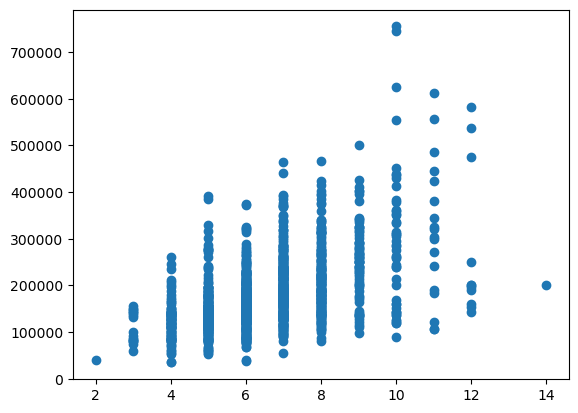

In [18]:
plt.scatter(train_df["TotRmsAbvGrd"], train_df["SalePrice"])

In [19]:
train_df["TotRmsAbvGrd"].sort_values().tail(5)

1230    12
1386    12
769     12
897     12
635     14
Name: TotRmsAbvGrd, dtype: int64

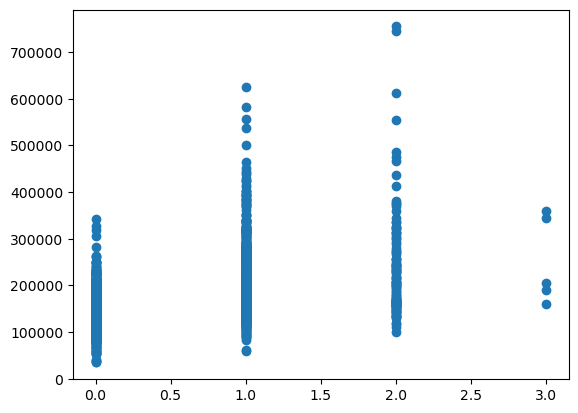

In [20]:
plt.scatter(train_df["Fireplaces"], train_df["SalePrice"])

In [21]:
train_df["Fireplaces"].sort_values().tail(6)

1250    2
642     3
1298    3
605     3
309     3
166     3
Name: Fireplaces, dtype: int64

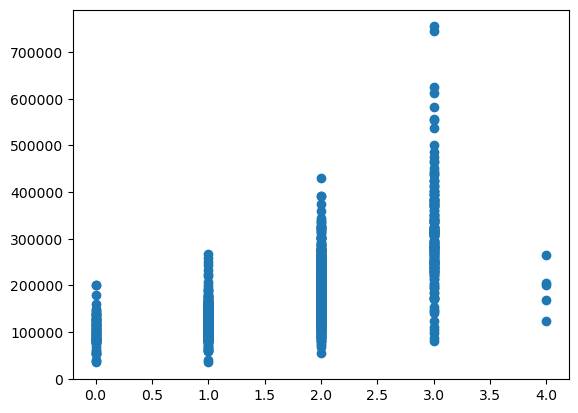

In [22]:
plt.scatter(train_df["GarageCars"], train_df["SalePrice"])

In [23]:
train_df["GarageCars"].sort_values().tail(6)

272     3
1340    4
1190    4
1350    4
747     4
420     4
Name: GarageCars, dtype: int64

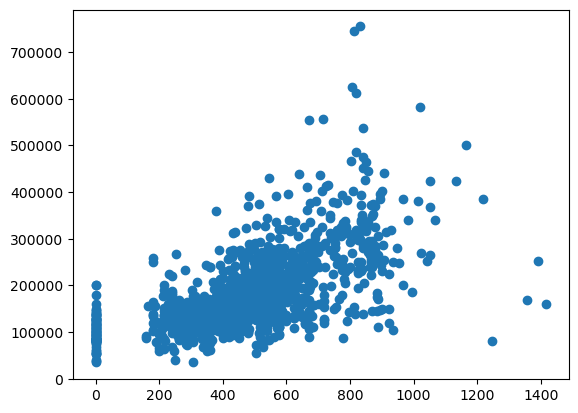

In [24]:
plt.scatter(train_df["GarageArea"], train_df["SalePrice"])

In [25]:
train_df["GarageArea"].sort_values().tail(6)

178     1166
825     1220
1061    1248
1190    1356
581     1390
1298    1418
Name: GarageArea, dtype: int64

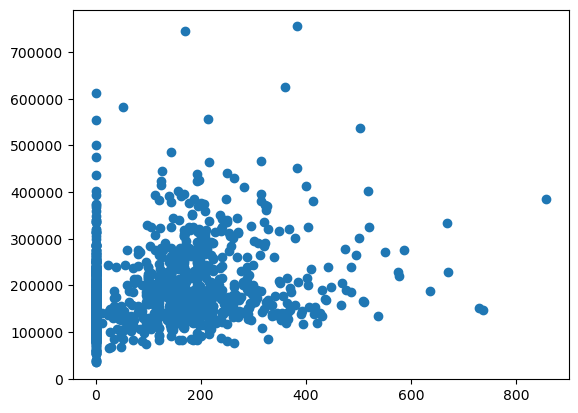

In [26]:
plt.scatter(train_df["WoodDeckSF"], train_df["SalePrice"])

In [27]:
train_df["WoodDeckSF"].sort_values().tail(10)

961     550
169     574
64      576
1423    586
1210    635
1313    668
335     670
1068    728
1459    736
53      857
Name: WoodDeckSF, dtype: int64

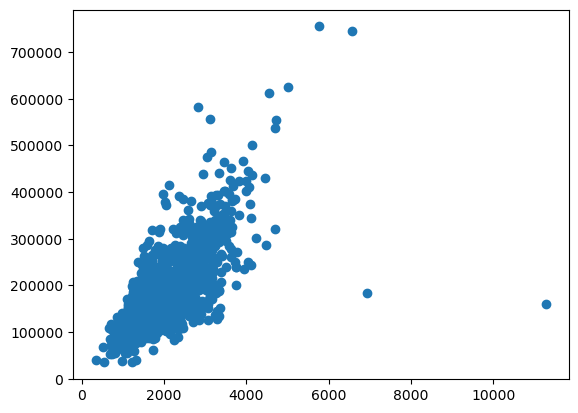

In [28]:
plt.scatter(train_df["TotalSF"], train_df["SalePrice"])

In [29]:
train_df["TotalSF"].sort_values().tail(4)

691      5771
1182     6572
523      6936
1298    11286
Name: TotalSF, dtype: int64

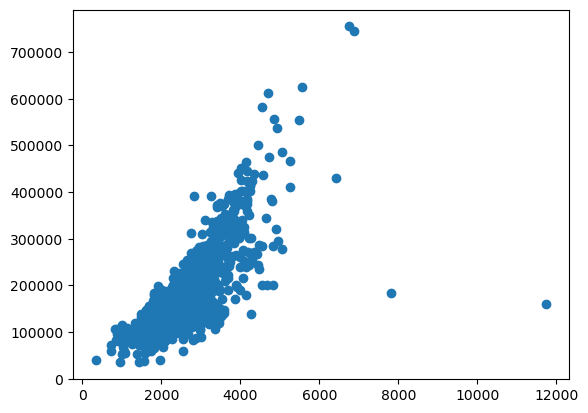

In [30]:
plt.scatter(train_df["TotalArea"], train_df["SalePrice"])

In [31]:
train_df["TotalArea"].sort_values().tail(3)

1182     6872
523      7814
1298    11752
Name: TotalArea, dtype: int64

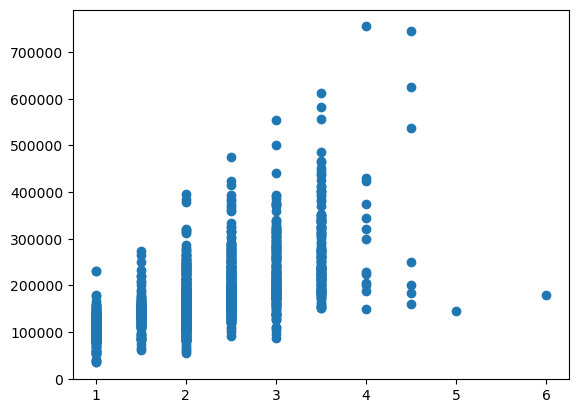

In [32]:
plt.scatter(train_df["TotalBath"], train_df["SalePrice"])

In [33]:
train_df["TotalBath"].sort_values().tail(6)

1350    4.5
769     4.5
523     4.5
1386    4.5
921     5.0
738     6.0
Name: TotalBath, dtype: float64

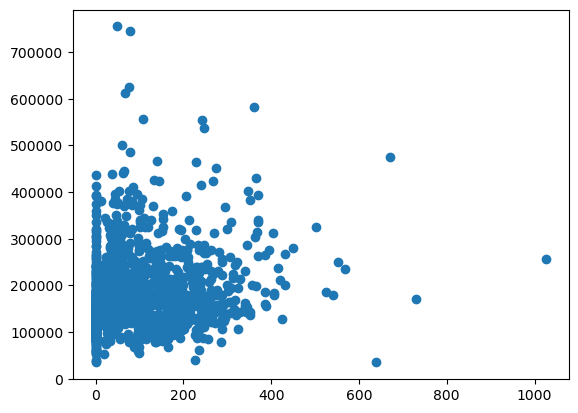

In [34]:
plt.scatter(train_df["TotalPorchSF"], train_df["SalePrice"])

In [35]:
train_df["TotalPorchSF"].sort_values().tail(9)

583      502
1184     526
205      542
1386     552
197      568
495      638
185      670
854      730
1328    1027
Name: TotalPorchSF, dtype: int64

In [36]:
values = [ 298, 934, 706, 249, 335, 313, 691, 1169, 297, 224, 185, 635, 48, 809, 642, 605, 309, 166, 420, 747, 1350, 1190, 1340, 825, 1061, 581, 53, 1210, 1313, 1068, 1459, 523, 738, 583, 526, 542, 552, 568, 638, 670, 730, 1027]
train_df = train_df[train_df.Id.isin(values) == False]

### Drop:
##### LotFrontage > 300
##### LotArea > 10000
##### MasVnrArea > 1150
##### BsmtUnfSF > 2200
##### LowQualFinSF > 570
##### BedroomAbvGr > 7
##### KitchenAbvGr > 2
##### TotRmsAbvGrd > 13
##### Fireplaces > 2.5
##### GarageCars > 3.5
##### GarageArea > 1200
##### WoodDeckSF > 600
##### TotalSF > 5770
##### TotalArea > 5800
##### TotalBath >= 5
##### TotalPorchSF > 500

In [37]:
print(f"Our dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns")

Our dataset has 1418 rows and 67 columns


In [38]:
train_df.drop(columns=['Id'], inplace=True)
train_df.to_csv("../Data/Data/train_filter_scat.csv", index=False)